The following code generates artificial datasets and plots the data. Study the code and the data as these will be used for for classification.

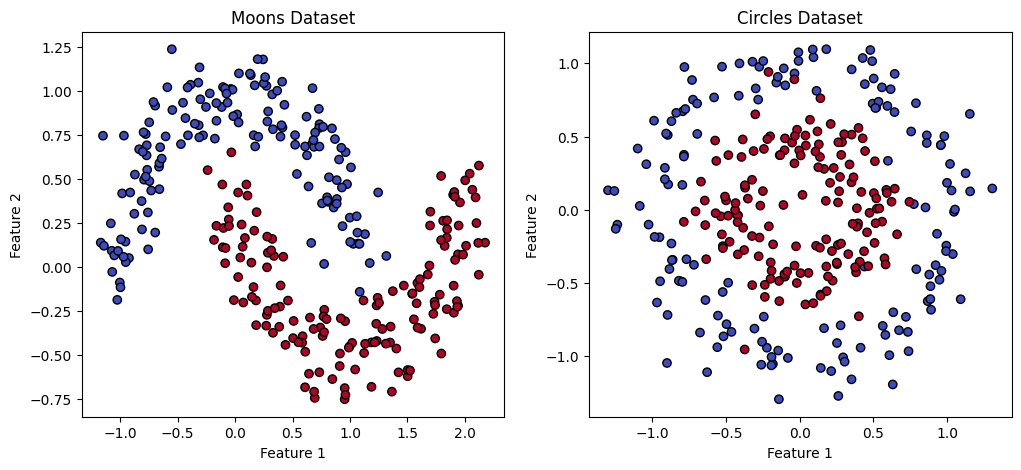

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
np.random.seed(hash("CS > ECE") % (2**32))
# Generate the moons dataset
X_moons, y_moons = make_moons(n_samples=300, noise=0.15, random_state=0xECE483)

# Generate the circles dataset
X_circles, y_circles = make_circles(n_samples=300, noise=0.15, factor=0.5, random_state=0xECE483)

# Plot the moons dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='coolwarm', edgecolors='k')
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the circles dataset
plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='coolwarm', edgecolors='k')
plt.title("Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()



Implement classification of both synthetic datasets using logistic discrimination (LDA classifer). Perform the following steps:
1) Study the function "train_test_split" of scikit learn.
2) Study the classifier "LDA" of scikit learn. Use this classifier on the training set. 
3) Use trained classifiers on the test set, plot the classiification results, showing correctly and incorrectly classiifed data points, as well as as decision boundary. An example of a function to plot decision boundary is shown below.


In [2]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax, title, misclassified):
    """
    Plots the decision boundary for a given classification model.
    
    Parameters:
    model : Classifier object
        The trained classifier used for making predictions.
    X : ndarray
        Feature matrix of the dataset (2D points).
    y : ndarray
        Target labels corresponding to X.
    ax : matplotlib.axes.Axes
        The axis on which the plot will be drawn.
    title : str
        Title of the plot.
    misclassified : ndarray
        Data points that were misclassified by the model.
    """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.scatter(misclassified[:, 0], misclassified[:, 1], facecolors='none', edgecolors='green', s=100, label='Misclassified')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

--- LDA Classification Report for Moons Dataset ---
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.94      0.88      0.91        50

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



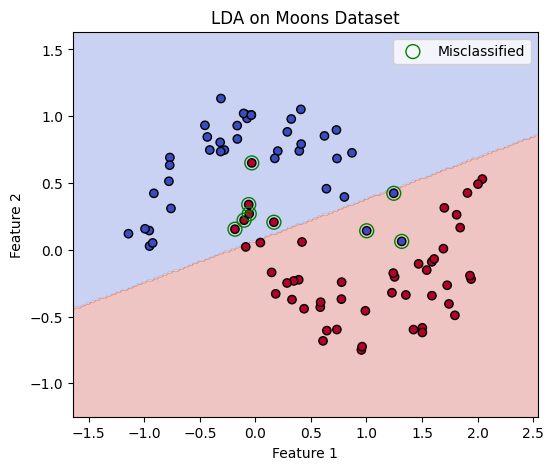

--- LDA Classification Report for Circles Dataset ---
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        40
           1       0.00      0.00      0.00        50

    accuracy                           0.44        90
   macro avg       0.22      0.50      0.31        90
weighted avg       0.20      0.44      0.27        90



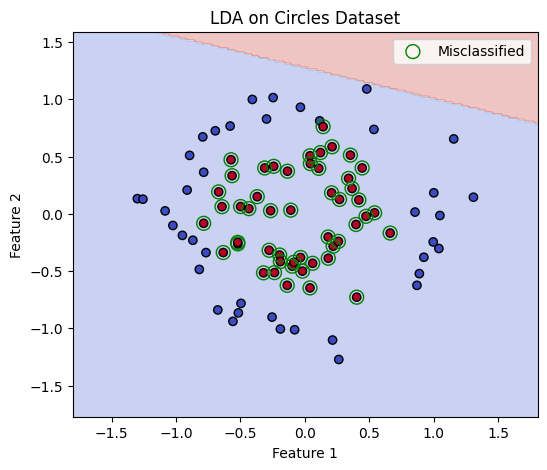

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def lda_classification(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
    
    # Train LDA classifier
    lda = LDA()
    lda.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = lda.predict(X_test)
    
    # Identify misclassified points
    misclassified = X_test[y_pred != y_test]
    
    # Print classification metrics
    print(f"--- LDA Classification Report for {dataset_name} ---")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot decision boundary
    fig, ax = plt.subplots(figsize=(6, 5))
    plot_decision_boundary(lda, X_test, y_test, ax, f"LDA on {dataset_name}", misclassified)
    plt.show()
    
    return lda

lda_moons = lda_classification(X_moons, y_moons, "Moons Dataset")
lda_circles = lda_classification(X_circles, y_circles, "Circles Dataset")

**Problem 2** Use Support Vector Machine with linear, polynomial and Gaussian kernels to perfrom classification on both datasets.
Perform the following steps:
1) Study the "SVC" classifier of scikit learn.
2) Use SVC with the linear kernel to perform training/classification. Visualize the decision boundary and classification accuracy.
3) Use SVC with the 2nd order polynomial kernel to perform training/classification. Visualize the decision boundary and classification accuracy.
4) Use SVC with the Gaussian kernel and default kernel parameters (C and gamma) perform training/classification. Visualize the decision boundary and classification accuracy.



--- SVM (linear kernel) Classification Report for Moons Dataset ---
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        40
           1       0.93      0.84      0.88        50

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



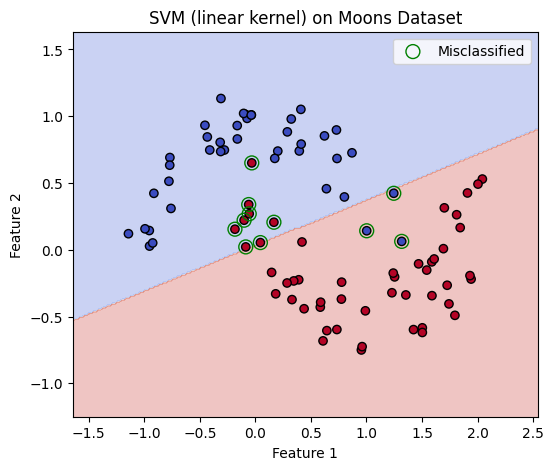

--- SVM (linear kernel) Classification Report for Circles Dataset ---
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        40
           1       0.00      0.00      0.00        50

    accuracy                           0.44        90
   macro avg       0.22      0.50      0.31        90
weighted avg       0.20      0.44      0.27        90



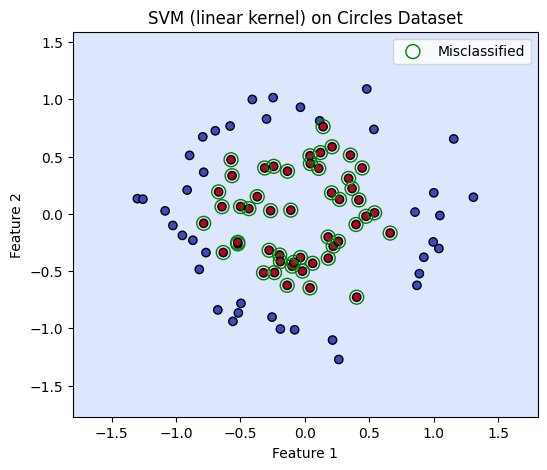

--- SVM (poly kernel) Classification Report for Moons Dataset ---
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        40
           1       0.80      0.96      0.87        50

    accuracy                           0.84        90
   macro avg       0.87      0.83      0.84        90
weighted avg       0.86      0.84      0.84        90



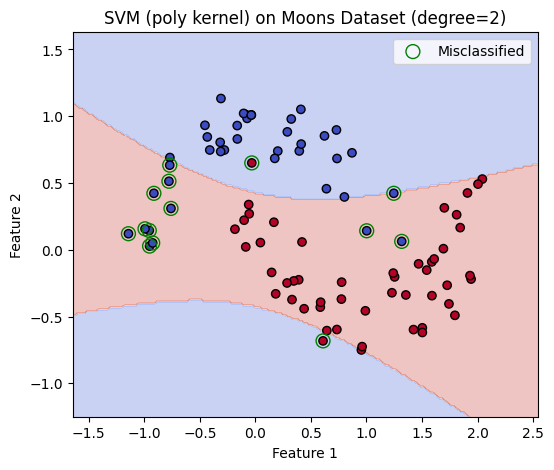

--- SVM (poly kernel) Classification Report for Circles Dataset ---
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.94      0.97        50

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



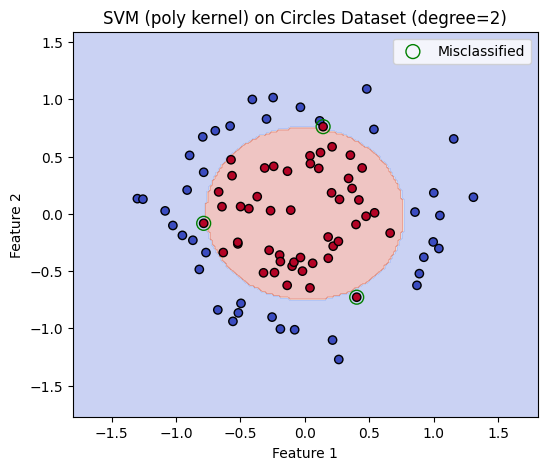

--- SVM (rbf kernel) Classification Report for Moons Dataset ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        50

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



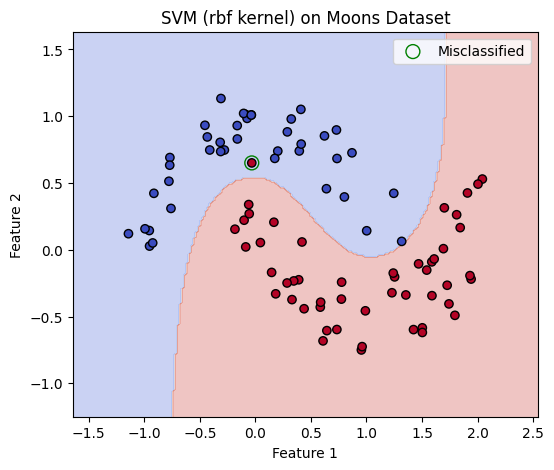

--- SVM (rbf kernel) Classification Report for Circles Dataset ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.90      0.95        50

    accuracy                           0.94        90
   macro avg       0.94      0.95      0.94        90
weighted avg       0.95      0.94      0.94        90



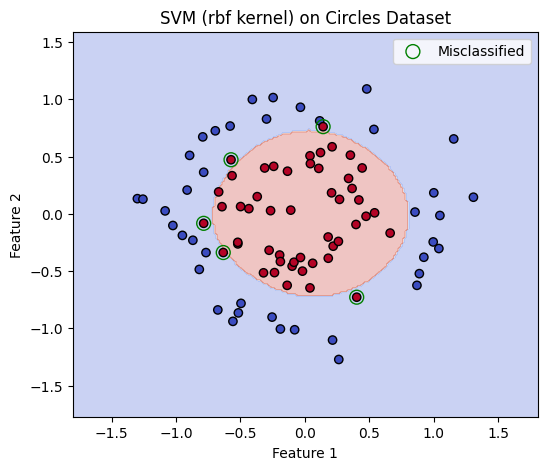

In [4]:
def svm_classification(X, y, dataset_name, kernel, degree=None, C=1.0, gamma='scale'):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
    
    
    if kernel == 'poly' and degree is not None:
        svc = SVC(kernel=kernel, degree=degree, C=C, gamma=gamma, random_state=42)
    else:
        svc = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
    
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    misclassified = X_test[y_pred != y_test]
    
    print(f"--- SVM ({kernel} kernel) Classification Report for {dataset_name} ---")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot decision boundary
    fig, ax = plt.subplots(figsize=(6, 5))
    title = f"SVM ({kernel} kernel) on {dataset_name}"
    if kernel == 'poly':
        title += f" (degree={degree})"
    plot_decision_boundary(svc, X_test, y_test, ax, title, misclassified)
    plt.show()
    
    return svc


# Linear kernel SVM
svm_linear_moons = svm_classification(X_moons, y_moons, "Moons Dataset", kernel='linear')
svm_linear_circles = svm_classification(X_circles, y_circles, "Circles Dataset", kernel='linear')

# 2nd order polynomial kernel SVM
svm_poly_moons = svm_classification(X_moons, y_moons, "Moons Dataset", kernel='poly', degree=2)
svm_poly_circles = svm_classification(X_circles, y_circles, "Circles Dataset", kernel='poly', degree=2)

# Gaussian (RBF) kernel SVM
svm_rbf_moons = svm_classification(X_moons, y_moons, "Moons Dataset", kernel='rbf', gamma='scale')
svm_rbf_circles = svm_classification(X_circles, y_circles, "Circles Dataset", kernel='rbf', gamma='scale')


**Problem 3**
Investigate the effect of Gaussian kernel parameters (c and gamma) on potential overfitting and underfitting of the models. 
Perform the following steps:
1. Write code that performs a grid search varying c between 0.01 and 1000 and gamma between 0.01 and 100. For each combination of c and gamma, print values of c, gamma and accuracy (Example: "C:0.01 Gamma:0.01 Accuracy:xx.xx")
2. Visualize decision boundaries for extreme values of c and gamma that produce the worst accuracy
3. Visulaize decision boundaries for the best combination of c and gamma that results in the highest accuracy


Moons Dataset:
--- Grid Search Results for Gaussian SVM on Moons Dataset ---
C:0.01 Gamma:0.01 Accuracy:0.4444
C:0.01 Gamma:0.1 Accuracy:0.4444
C:0.01 Gamma:1 Accuracy:0.4444
C:0.01 Gamma:10 Accuracy:0.4444
C:0.01 Gamma:100 Accuracy:0.4444
C:0.1 Gamma:0.01 Accuracy:0.4444
C:0.1 Gamma:0.1 Accuracy:0.8667
C:0.1 Gamma:1 Accuracy:0.9556
C:0.1 Gamma:10 Accuracy:0.9889
C:0.1 Gamma:100 Accuracy:0.4444
C:1 Gamma:0.01 Accuracy:0.8667
C:1 Gamma:0.1 Accuracy:0.8778
C:1 Gamma:1 Accuracy:0.9889
C:1 Gamma:10 Accuracy:0.9889
C:1 Gamma:100 Accuracy:0.9778
C:10 Gamma:0.01 Accuracy:0.8778
C:10 Gamma:0.1 Accuracy:0.9333
C:10 Gamma:1 Accuracy:0.9889
C:10 Gamma:10 Accuracy:0.9889
C:10 Gamma:100 Accuracy:0.9889
C:100 Gamma:0.01 Accuracy:0.9000
C:100 Gamma:0.1 Accuracy:0.9889
C:100 Gamma:1 Accuracy:0.9889
C:100 Gamma:10 Accuracy:0.9889
C:100 Gamma:100 Accuracy:0.9889
C:1000 Gamma:0.01 Accuracy:0.9111
C:1000 Gamma:0.1 Accuracy:1.0000
C:1000 Gamma:1 Accuracy:1.0000
C:1000 Gamma:10 Accuracy:0.9889
C:1000 Gamma:

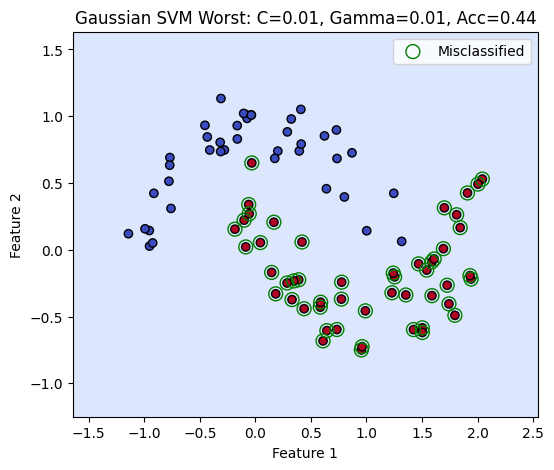

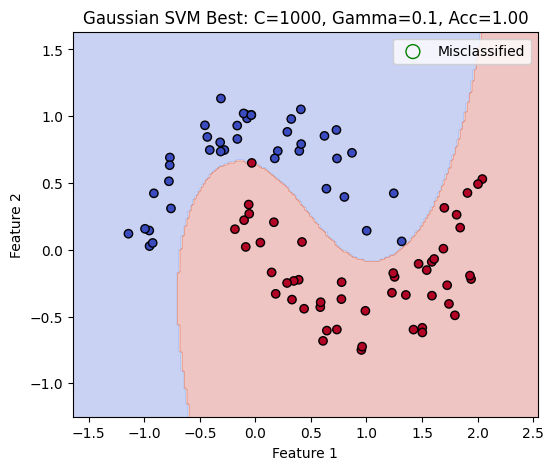

Circles Dataset:
--- Grid Search Results for Gaussian SVM on Circles Dataset ---
C:0.01 Gamma:0.01 Accuracy:0.4444
C:0.01 Gamma:0.1 Accuracy:0.4444
C:0.01 Gamma:1 Accuracy:0.4444
C:0.01 Gamma:10 Accuracy:0.4444
C:0.01 Gamma:100 Accuracy:0.4444
C:0.1 Gamma:0.01 Accuracy:0.4444
C:0.1 Gamma:0.1 Accuracy:0.4444
C:0.1 Gamma:1 Accuracy:0.9444
C:0.1 Gamma:10 Accuracy:0.9000
C:0.1 Gamma:100 Accuracy:0.4444
C:1 Gamma:0.01 Accuracy:0.4444
C:1 Gamma:0.1 Accuracy:0.9556
C:1 Gamma:1 Accuracy:0.9444
C:1 Gamma:10 Accuracy:0.9667
C:1 Gamma:100 Accuracy:0.9222
C:10 Gamma:0.01 Accuracy:0.4444
C:10 Gamma:0.1 Accuracy:0.9778
C:10 Gamma:1 Accuracy:0.9444
C:10 Gamma:10 Accuracy:0.9667
C:10 Gamma:100 Accuracy:0.9222
C:100 Gamma:0.01 Accuracy:0.9778
C:100 Gamma:0.1 Accuracy:0.9556
C:100 Gamma:1 Accuracy:0.9444
C:100 Gamma:10 Accuracy:0.9556
C:100 Gamma:100 Accuracy:0.9111
C:1000 Gamma:0.01 Accuracy:0.9778
C:1000 Gamma:0.1 Accuracy:0.9667
C:1000 Gamma:1 Accuracy:0.9556
C:1000 Gamma:10 Accuracy:0.9444
C:1000 Ga

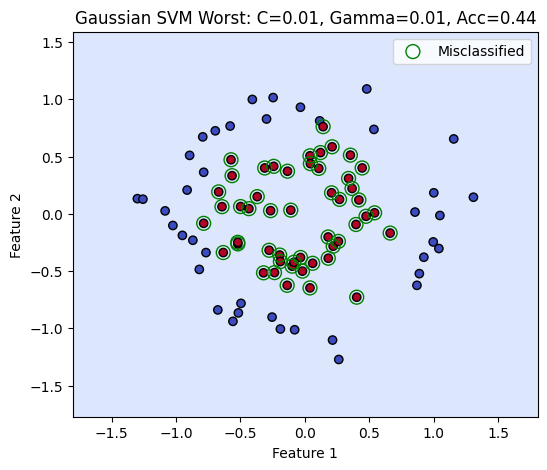

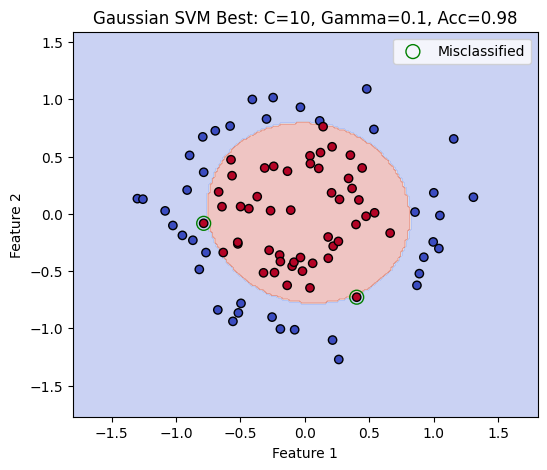

In [5]:
def grid_search_gaussian(X, y, dataset_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
    
    # Define ranges for C and gamma
    C_values = [0.01, 0.1, 1, 10, 100, 1000]
    gamma_values = [0.01, 0.1, 1, 10, 100]
    
    best_accuracy = 0
    best_params = None
    worst_accuracy = 1
    worst_params = None
    results = []
    
    print(f"--- Grid Search Results for Gaussian SVM on {dataset_name} ---")
    for C in C_values:
        for gamma in gamma_values:
            svc = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append((C, gamma, acc))
            print(f"C:{C} Gamma:{gamma} Accuracy:{acc:.4f}")
            if acc > best_accuracy:
                best_accuracy = acc
                best_params = (C, gamma)
            if acc < worst_accuracy:
                worst_accuracy = acc
                worst_params = (C, gamma)
    
    # Plot decision boundary for worst case
    svc_worst = SVC(kernel='rbf', C=worst_params[0], gamma=worst_params[1], random_state=42)
    svc_worst.fit(X_train, y_train)
    y_pred_worst = svc_worst.predict(X_test)
    misclassified_worst = X_test[y_pred_worst != y_test]
    fig, ax = plt.subplots(figsize=(6, 5))
    title_worst = f"Gaussian SVM Worst: C={worst_params[0]}, Gamma={worst_params[1]}, Acc={worst_accuracy:.2f}"
    plot_decision_boundary(svc_worst, X_test, y_test, ax, title_worst, misclassified_worst)
    plt.show()
    
    # Plot decision boundary for best case
    svc_best = SVC(kernel='rbf', C=best_params[0], gamma=best_params[1], random_state=42)
    svc_best.fit(X_train, y_train)
    y_pred_best = svc_best.predict(X_test)
    misclassified_best = X_test[y_pred_best != y_test]
    fig, ax = plt.subplots(figsize=(6, 5))
    title_best = f"Gaussian SVM Best: C={best_params[0]}, Gamma={best_params[1]}, Acc={best_accuracy:.2f}"
    plot_decision_boundary(svc_best, X_test, y_test, ax, title_best, misclassified_best)
    plt.show()
    
    return results, best_params, worst_params

print("Moons Dataset:")
results_moons, best_params_moons, worst_params_moons = grid_search_gaussian(X_moons, y_moons, "Moons Dataset")

print("Circles Dataset:")
results_circles, best_params_circles, worst_params_circles = grid_search_gaussian(X_circles, y_circles, "Circles Dataset")